# HEART DISEASE PREDICTION:

# Introduction:

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In this I have performed Exploratory Data Analysis on the Heart Diseases UCI and tried to identify relationship between heart disease and various other features. After EDA data pre-processing is done I have applied Logistic Regression Algorithm and other Algorithms to make the predictions.

# Data Information:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')

# Data Overview:

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

as we can see all the values are numeric:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


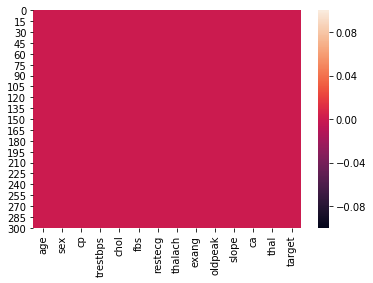

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

there are no null values in the dataset:

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The features described in the above data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.

Checking features of various attributes:

# 1. SEX:

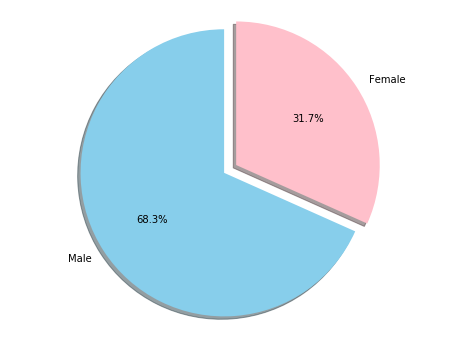

In [11]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'pink']
explode = (0, 0.1)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

# 2. Chest Pain Type: 

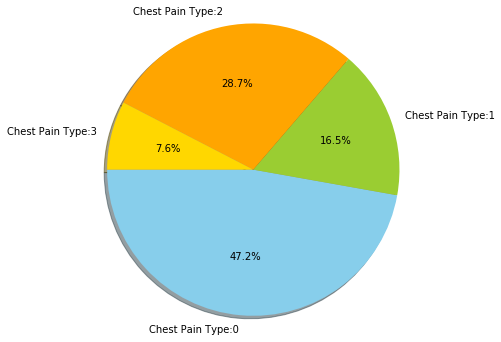

In [12]:
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),
         len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]

plt.figure(figsize=(8,6))
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

# 3. fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false):

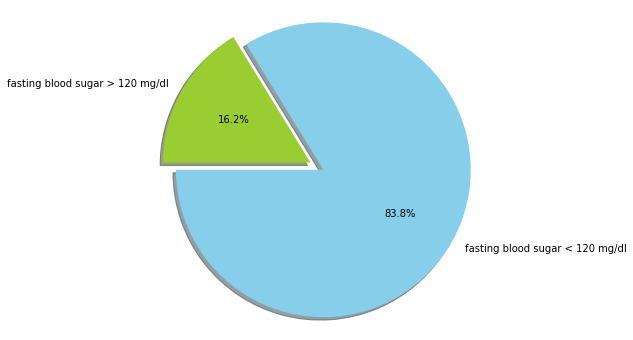

In [13]:
plt.figure(figsize=(8,6))

labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

# Data Exploration:

In [14]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

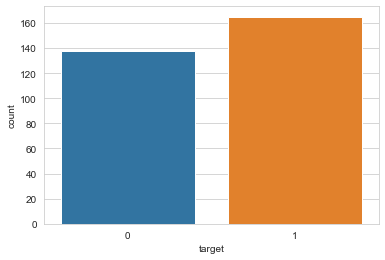

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

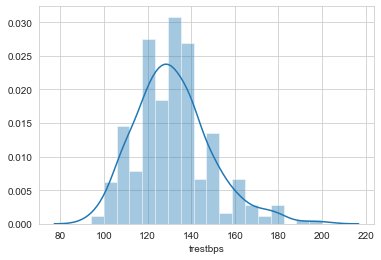

In [16]:
sns.distplot(df['trestbps'])

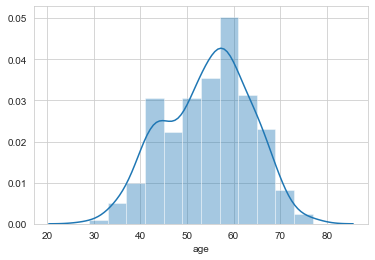

In [17]:
sns.distplot(df['age'])

In [18]:
NoDisease = len(df[df.target == 0])
HaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((NoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


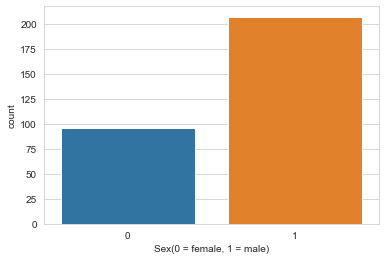

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=df)
plt.xlabel("Sex(0 = female, 1 = male)")
plt.show()

In [20]:
count_Female = len(df[df.sex == 0])
count_Male = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((count_Female / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((count_Male / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [21]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [22]:
df.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


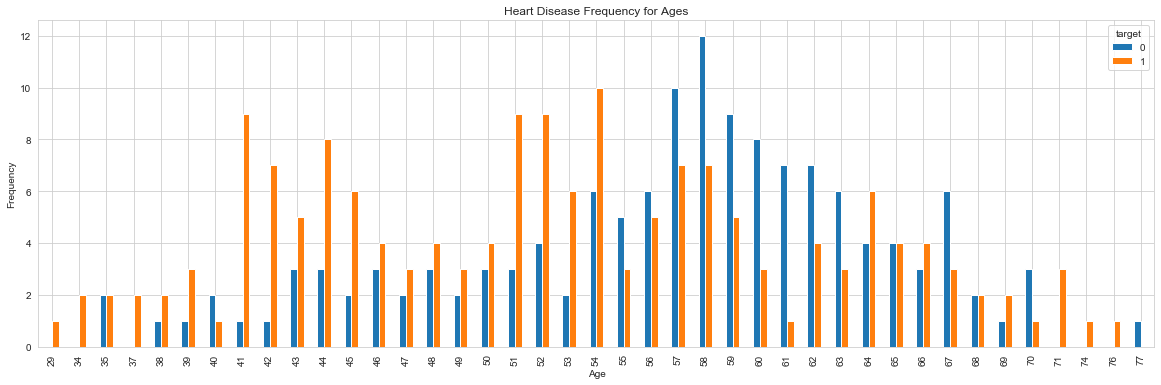

In [23]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

conclusion:
>from above we can say that persons having age between 41-45 are having more heart disease than persons not having heart disease
>and persons having age between 55-63 are not having heart disease compare to persons having heart disaese

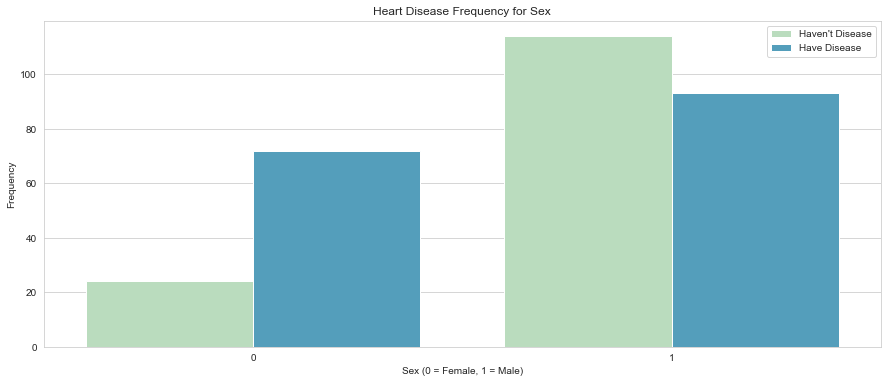

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(x='sex',data = df, hue = 'target',palette='GnBu')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

conclusion:
>as we can see in females, there are more cases of having Heart Disease(around 70) than not having heart disease
>while in male case, there are more persons which are not having Heart Disease

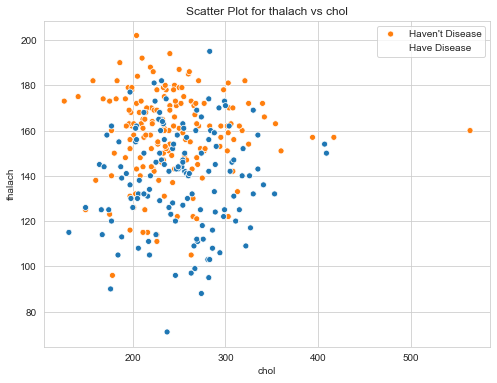

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.title('Scatter Plot for thalach vs chol')
plt.xlabel('chol')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('thalach')
plt.show()

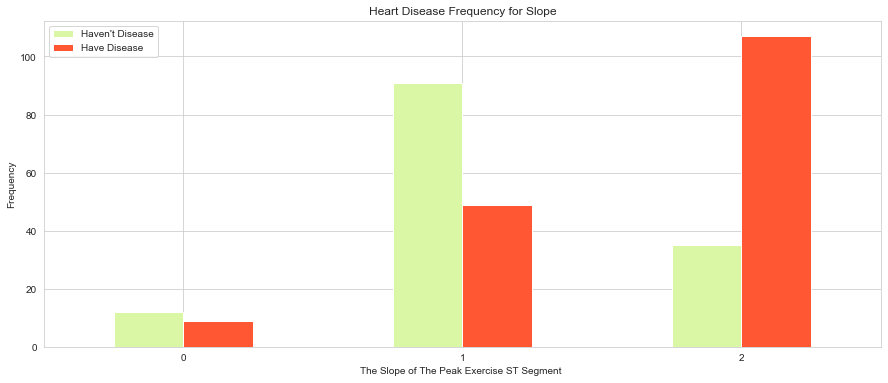

In [26]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

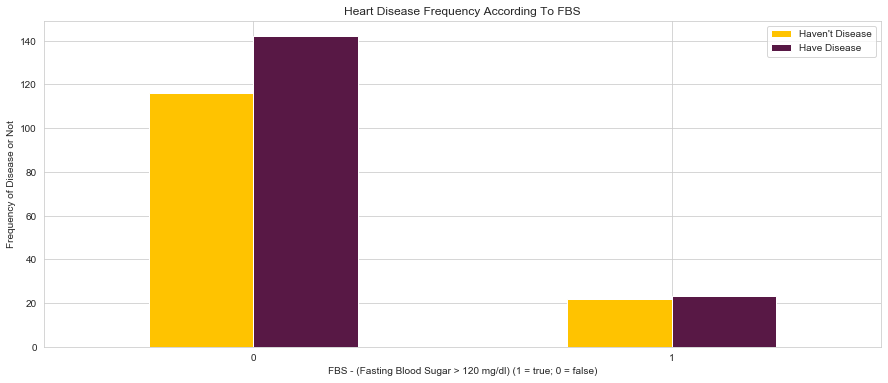

In [27]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

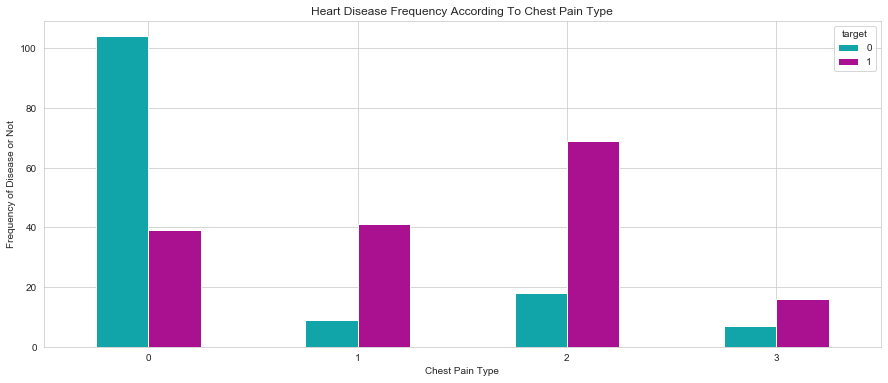

In [28]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [29]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.9521966 , 0.68100522, 1.97312292, ..., 0.71442887, 2.14887271,
        0.91452919],
       [1.91531289, 0.68100522, 1.00257707, ..., 0.71442887, 0.51292188,
        0.91452919],
       [1.47415758, 1.46841752, 0.03203122, ..., 0.71442887, 0.51292188,
        0.91452919],
       ...,
       [1.50364073, 0.68100522, 0.93851463, ..., 1.24459328, 1.12302895,
        1.09345881],
       [0.29046364, 0.68100522, 0.93851463, ..., 0.26508221, 1.12302895,
        1.09345881],
       [0.29046364, 1.46841752, 0.03203122, ..., 0.26508221, 0.51292188,
        1.09345881]])

In [30]:
threshold=3
print(np.where(z>3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [31]:
df_new=df[(z<3).all(axis=1)]

In [32]:
df_new.shape

(287, 14)

In [33]:
df.shape

(303, 14)

In [34]:
df=df_new

In [35]:
df.shape

(287, 14)

In [36]:
#so,previously we have 303 rows now we are left with 287 rows:

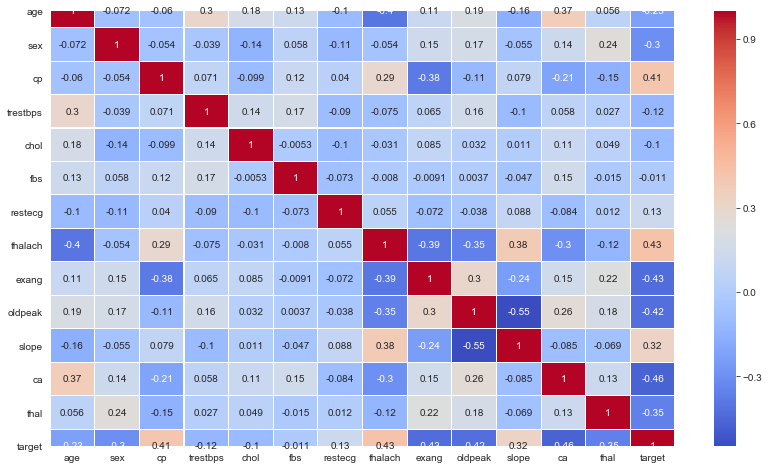

In [37]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# Making Predictions:

In [38]:
x= df.drop('target',axis=1)
y=df['target']

In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=54)

In [41]:
x_train.shape

(192, 13)

In [42]:
y_train.shape

(192,)

In [43]:
x_test.shape

(95, 13)

In [44]:
y_test.shape

(95,)

# Logistic Regression: 

In [45]:
lg=LogisticRegression()

In [46]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.8315789473684211
[[39  9]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.82      0.85      0.83        47

    accuracy                           0.83        95
   macro avg       0.83      0.83      0.83        95
weighted avg       0.83      0.83      0.83        95



In [172]:
accuracies = {}
acc_lg = lg.score(x_test,y_test)*100
accuracies['LogisticRegression'] = acc_lg
print("Test Accuracy of Logistic Regression Algorithm: {:.2f}%".format(acc_lg))

Test Accuracy of Logistic Regression Algorithm: 83.16%


In [173]:
#we can plot ROC_AUC curve for Logistic regression:

In [174]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score 

In [175]:
y_pred_prob=lg.predict_proba(x_test)[:,0]
y_pred_prob

array([0.30395442, 0.91754577, 0.25464569, 0.52518423, 0.99470007,
       0.93076086, 0.05369687, 0.31861216, 0.94946979, 0.06538033,
       0.56718388, 0.49317607, 0.21284339, 0.99210376, 0.99216923,
       0.98777535, 0.09905779, 0.68793208, 0.1384212 , 0.08338565,
       0.85846194, 0.10275418, 0.88215719, 0.08769674, 0.06532479,
       0.0545812 , 0.25227505, 0.16991428, 0.53737114, 0.0931619 ,
       0.11691693, 0.84032431, 0.02513631, 0.14856045, 0.91186163,
       0.71927659, 0.93621516, 0.15438694, 0.33804444, 0.99550423,
       0.99208142, 0.67272939, 0.61681186, 0.09821017, 0.05738126,
       0.36611147, 0.03539228, 0.25170542, 0.02391436, 0.41759008,
       0.81633169, 0.89417364, 0.43088789, 0.32255282, 0.47183361,
       0.97870839, 0.05622512, 0.3039598 , 0.9541775 , 0.84530591,
       0.01333944, 0.99837506, 0.21296649, 0.80619375, 0.04017811,
       0.13464266, 0.91815566, 0.33311148, 0.88422854, 0.30362687,
       0.9843027 , 0.99144313, 0.01544114, 0.10545975, 0.61348

In [176]:
tpr_lg,fpr_lg,thresholds=roc_curve(y_test,y_pred_prob)
tpr_lg

array([0.        , 0.02083333, 0.52083333, 0.52083333, 0.70833333,
       0.70833333, 0.8125    , 0.8125    , 0.85416667, 0.85416667,
       0.89583333, 0.89583333, 0.91666667, 0.91666667, 0.9375    ,
       0.9375    , 0.95833333, 0.95833333, 0.97916667, 0.97916667,
       1.        , 1.        ])

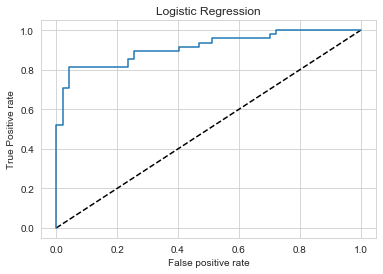

In [177]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lg,tpr_lg,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Logistic Regression')
plt.show()

In [178]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.831781914893617

# GaussianNB:

In [179]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8
[[38 10]
 [ 9 38]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        48
           1       0.79      0.81      0.80        47

    accuracy                           0.80        95
   macro avg       0.80      0.80      0.80        95
weighted avg       0.80      0.80      0.80        95



In [181]:
accuracies = {}
acc_gnb = gnb.score(x_test,y_test)*100
accuracies['GaussianNB'] = acc_gnb
print("Test Accuracy of GaussianNB Algorithm: {:.2f}%".format(acc_gnb))

Test Accuracy of GaussianNB Algorithm: 80.00%


# SVC:

In [182]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8421052631578947
[[40  8]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.83      0.85      0.84        47

    accuracy                           0.84        95
   macro avg       0.84      0.84      0.84        95
weighted avg       0.84      0.84      0.84        95



In [183]:
accuracies = {}
acc_svc = svc.score(x_test,y_test)*100
accuracies['SVC'] = acc_svc
print("Test Accuracy of SVC Algorithm: {:.2f}%".format(acc_svc))

Test Accuracy of SVC Algorithm: 84.21%


# Decision Tree Classifier:

In [184]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7368421052631579
[[37 11]
 [14 33]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        48
           1       0.75      0.70      0.73        47

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95



In [186]:
accuracies = {}
acc_dtc = dtc.score(x_test,y_test)*100
accuracies['DecisionTreeClassifier'] = acc_dtc
print("Test Accuracy of Decision Tree Classifier Algorithm: {:.2f}%".format(acc_dtc))

Test Accuracy of Decision Tree Classifier Algorithm: 73.68%


In [187]:
y_pred_prob=dtc.predict_proba(x_test)[:,0]
y_pred_prob

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0.])

In [188]:
tpr_dtc,fpr_dtc,thresholds=roc_curve(y_test,y_pred_prob)
tpr_dtc

array([0.        , 0.77083333, 1.        ])

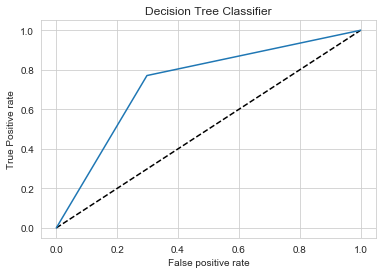

In [189]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_dtc,tpr_dtc,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [190]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

0.7364804964539007

# KNN:

In [191]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8315789473684211
[[35 13]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        48
           1       0.77      0.94      0.85        47

    accuracy                           0.83        95
   macro avg       0.85      0.83      0.83        95
weighted avg       0.85      0.83      0.83        95



In [192]:
accuracies = {}
acc_knn = knn.score(x_test,y_test)*100
accuracies['KNeighborsClassifier'] = acc_knn
print("Test Accuracy of KNN Algorithm: {:.2f}%".format(acc_knn))

Test Accuracy of KNN Algorithm: 83.16%


In [193]:
y_pred_prob=knn.predict_proba(x_test)[:,0]
y_pred_prob

array([0.2, 0.8, 0.2, 0.4, 0.8, 0.8, 0.2, 0.4, 1. , 0. , 0.4, 0.4, 0.2,
       1. , 0.8, 1. , 0. , 0.8, 0.2, 0.4, 0.6, 0. , 0.4, 0. , 0. , 0. ,
       0. , 0. , 0.2, 0. , 0.4, 0.8, 0. , 0.2, 0.8, 0.2, 0.6, 0.2, 0.2,
       1. , 1. , 0.6, 0.4, 0. , 0. , 0.2, 0. , 0.2, 0. , 0.4, 0.6, 0.8,
       0.6, 0.2, 0.8, 0.8, 0.4, 0.2, 0.6, 0.8, 0. , 1. , 0. , 0.4, 0.2,
       0.4, 0.8, 0.4, 0.8, 0.2, 0.8, 0.8, 0. , 0. , 0.2, 0.6, 0.8, 0. ,
       0.6, 0.8, 0.2, 0.6, 0.4, 0.2, 0. , 0.8, 0.6, 0.6, 0. , 1. , 0.2,
       0. , 0.2, 1. , 1. ])

In [194]:
tpr_knn,fpr_knn,thresholds=roc_curve(y_test,y_pred_prob)
tpr_knn

array([0.        , 0.1875    , 0.54166667, 0.72916667, 0.875     ,
       0.97916667, 1.        ])

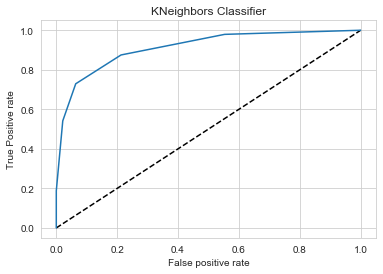

In [195]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('KNeighbors Classifier')
plt.show()

In [196]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

0.8326684397163121

# Random Forest Classifier:

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8736842105263158
[[41  7]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.86      0.89      0.88        47

    accuracy                           0.87        95
   macro avg       0.87      0.87      0.87        95
weighted avg       0.87      0.87      0.87        95



In [200]:
accuracies = {}
acc_rf = rf.score(x_test,y_test)*100
accuracies['Random Forest Classifier'] = acc_lg
print("Test Accuracy of Random Forest Classifier : {:.2f}%".format(acc_rf))

Test Accuracy of Random Forest Classifier : 87.37%


# Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree:

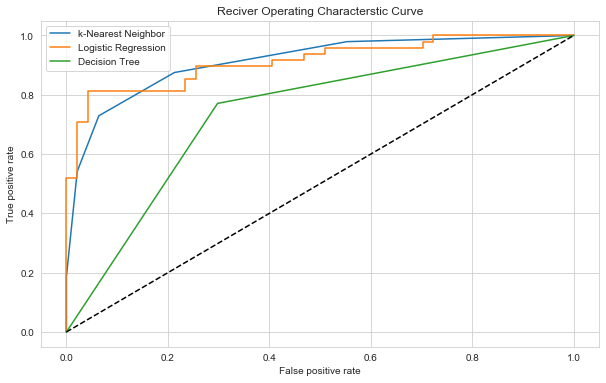

In [202]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(fpr_knn,tpr_knn,label='k-Nearest Neighbor')
plt.plot(fpr_lg,tpr_lg,label='Logistic Regression')
plt.plot(fpr_dtc,tpr_dtc,label='Decision Tree')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Comparing Models:

In [203]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'GaussianNB', 'SVC',
              'Decision_Tree_Calssifier', 'Random_Forest', 'K_Nearest Neighbour'],
            
             
    'Score': [acc_lg,acc_gnb,acc_svc,acc_dtc,
             acc_rf,acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random_Forest,87.368421
2,SVC,84.210526
0,Logistic Regression,83.157895
5,K_Nearest Neighbour,83.157895
1,GaussianNB,80.000000
3,Decision_Tree_Calssifier,73.684211


our models work fine but best from them is Random forest which gives accuracy of 87.36%